In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes== 'object'].index) 
#making a list of all the columsn names for "object" data type
# then we iterate throught the whole list to change all the data to 
# lowercase and replace " " to "_" 
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
df.totalcharges # here this is number but, the dtype is shown object
#thus we will try to change the object to number, and try to do something with it
#df.totalcharges=pd.to_numeric(df.totalcharges)
#by using this the above, we got to to know why it is object ValueError: Unable to parse string "_" at position 488 
df.totalcharges=pd.to_numeric(df.totalcharges, errors='coerce')# we then use errors to ignore 
df.totalcharges=df.totalcharges.fillna(0)# filling blank with 0

In [8]:
df["churn"] = (df["churn"]=='yes').astype(int)#changing yes and no to 0/1
#we are seeing if df.churn is yes, this will give true, false, then changing to int this will lead to 0/1 value

In [9]:
df["churn"].unique()

array([0, 1])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#setting up 60 20 20, from scikit learn
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [12]:
len(df_train), len(df_val), len(df_test)
df_full_train = df_full_train.reset_index(drop=True)
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [13]:
y_test = df_test.churn.values
y_train = df_train.churn.values
y_val = df_val.churn.values

In [14]:
del df_test["churn"]
del df_train["churn"]
del df_val["churn"]

## EDA


In [15]:
df_full_train=df_full_train.reset_index(drop=True)
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [16]:
df_full_train.churn.value_counts()
df_full_train.churn.mean()

0.2655307064252751

In [17]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [18]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [19]:
numerical = ["tenure","monthlycharges","totalcharges"]
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [20]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance: churn rate & risk ratio

In [21]:
#we want to see the churn of female customers
df_full_train[df_full_train.gender == 'female'].churn.mean()
# the churning rate of female is 0.26 

0.2708409173643975

In [22]:
#we want to see the churn of male customers
df_full_train[df_full_train.gender == 'male'].churn.mean()
# the churning rate of male is 0.26 

0.26047800484932454

In [23]:
#we want to see the churn of people who do not live with partner
df_full_train[df_full_train.partner == 'no'].churn.mean()
# the churning rate of ppl with no partner is 0.32  

0.32644628099173556

In [24]:
#we want to see the churn of people who live with partner
df_full_train[df_full_train.partner == 'yes'].churn.mean()
# the churning rate with people with partner is 0.2

0.20073260073260074

In [25]:
global_churn = df_full_train.churn.mean()

In [26]:
#the above value shows that the gender is probably more important to predict churn variable 
# difference global -group <0 more likely to churn
# difference global -group >0 less likely to churn

Risk Ratio = Group churn rate/ Gobal churn rate
If >1 more likely to churn
If <1 more likely to churn

In [27]:
from IPython.display import display

In [28]:
#we cant do the above step for each group, so we rae going to use a pandas groupby
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group["mean"]-global_churn
    df_group['risk'] = df_group["mean"]/global_churn
    print(c)
    display(df_group)
    print()
    print()
#values that are high or low, will have high feature importance

gender


,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.237098,4728,-0.028433,0.892922
1,0.413907,906,0.148377,1.558793




partner


,mean,count,diff,risk
partner,,,,
no,0.326446,2904,0.060916,1.229411
yes,0.200733,2730,-0.064798,0.755968




dependents


,mean,count,diff,risk
dependents,,,,
no,0.312326,3951,0.046795,1.176233
yes,0.155674,1683,-0.109856,0.586276




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.253623,552,-0.011908,0.955156
yes,0.266824,5082,0.001293,1.004871




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.251397,2685,-0.014134,0.946771
no_phone_service,0.253623,552,-0.011908,0.955156
yes,0.284105,2397,0.018574,1.069952




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.191851,1939,-0.073679,0.722521
fiber_optic,0.415558,2481,0.150028,1.565010
no,0.076606,1214,-0.188924,0.288502




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416014,2810,0.150484,1.566727
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.145342,1610,-0.120189,0.547363




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.398693,2448,0.133162,1.501494
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.216531,1972,-0.048999,0.815467




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.387706,2489,0.122175,1.460117
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.226825,1931,-0.038705,0.854234




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.413472,2791,0.147941,1.557153
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.152855,1629,-0.112676,0.575657




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335418,2239,0.069887,1.263197
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.298945,2181,0.033415,1.125841




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.333333,2223,0.067803,1.255348
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.301320,2197,0.035789,1.134784




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.426533,3083,0.161002,1.606340
one_year,0.117987,1212,-0.147544,0.444343
two_year,0.028379,1339,-0.237151,0.106878




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.16414,2309,-0.101390,0.618159
yes,0.33594,3325,0.070409,1.265164




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.174475,1238,-0.091056,0.657080
credit_card_(automatic),0.152404,1227,-0.113126,0.573961
electronic_check,0.449921,1887,0.184390,1.694420
mailed_check,0.190328,1282,-0.075203,0.716782


## Finding the mutual information featur importance
Using one value for example gender, how much do we know about churn

In [29]:
from sklearn.metrics import mutual_info_score 

In [30]:
mutual_info_score(df_full_train.churn, df_full_train.contract)
#here the order doesnt matter, and we are getting to know about the mutual importance
#higher the value, more is the importance of the feature
#we can use this on all the values

0.0966515250997

In [31]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.contract)

In [32]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            1.001969
techsupport         0.118947
deviceprotection    0.094334
onlinesecurity      0.092487
paymentmethod       0.072141
onlinebackup        0.068820
streamingmovies     0.058953
streamingtv         0.057521
partner             0.045262
internetservice     0.042376
dependents          0.029407
paperlessbilling    0.017054
seniorcitizen       0.012419
multiplelines       0.006936
gender              0.000065
phoneservice        0.000047
dtype: float64

# Feature importance
How about numerical columns?

Corelation coeffecient

In [33]:
# it is a value beyween -1 and 1
# corelation +vs when one is decreasing and other is increasing  
# corelation -ve when one is directly proportional
# low value of corelation: rarely any change
# moderate value of corelation: very moderately change
# high value of corelation: very strongly related

df_full_train.tenure.max()

72

In [34]:
df_full_train[numerical].corrwith(df_full_train.churn)
#when tenure increases then churn decreases
# monthly charges increases churn increases
# totalcharges increases then churn decreases(this is related to the time a person stays with a company)  

tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.193370
dtype: float64

In [35]:
print(df_full_train[df_full_train.tenure <=2].churn.mean())# what is the churn rate when the tenure is less than 2 months
print(df_full_train[df_full_train.tenure >12].churn.mean())# what is the churn rate when the tenure is greater than 12 months

0.5863636363636363
0.17205957883923986


# One hot encoding 

In [36]:
from sklearn.feature_extraction import DictVectorizer
dicts = df_train[['gender','contract']].iloc[:10].to_dict(orient='record')

C:\Users\souro\AppData\Local\Temp\ipykernel_53812\2139065280.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts = df_train[['gender','contract']].iloc[:10].to_dict(orient='record')


In [37]:
dv= DictVectorizer(sparse =False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [38]:
dv.get_feature_names()

C:\Users\souro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [39]:
dv.transform(dicts)

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [40]:
train_dicts = df_train[categorical+numerical].to_dict(orient='record')
# even if we record the other numerical values, this function is smart enough to differentiate them. 
# this leads to an one hot encoded value and then numerical values, thus whole od the data can be passed on to this array


C:\Users\souro\AppData\Local\Temp\ipykernel_53812\3319770271.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dicts = df_train[categorical+numerical].to_dict(orient='record')


In [41]:
train_dicts[0]
dv= DictVectorizer(sparse =False)

In [42]:
dv.fit(train_dicts)
X_train=dv.transform(train_dicts[0:5])

In [43]:
X_train = dv.fit_transform(train_dicts)

In [44]:
val_dicts=df_val[categorical+numerical].to_dict(orient='record')
X_val = dv.fit_transform(val_dicts)

C:\Users\souro\AppData\Local\Temp\ipykernel_53812\2710744991.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dicts=df_val[categorical+numerical].to_dict(orient='record')


# Logistic Regression


In [45]:
from cmath import exp


def sigmoid(x):
    return (1/(1+exp(-x)))

def linear_regressio(xi):
    result = w0

    for i in range(len(w)):
        result +=(x[i]*w[i])
    
    return sigmoid(result)


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
model.coef_[0].round(2)

array([ 0.55, -0.21, -0.47, -0.05, -0.07,  0.04, -0.11, -0.05,  0.03,
       -0.15, -0.31,  0.29, -0.11,  0.  , -0.21,  0.12, -0.04,  0.09,
       -0.11, -0.1 ,  0.24, -0.11, -0.25, -0.23,  0.11, -0.1 , -0.02,
       -0.11, -0.18,  0.25, -0.09,  0.12, -0.25,  0.18, -0.15, -0.11,
        0.14, -0.07, -0.11,  0.05,  0.2 , -0.11, -0.21, -0.06,  0.  ])

In [49]:
y_pred=model.predict_proba(X_val)[:,1]# we find the prediction of [0,1] for each value


In [50]:
churn_decision = (y_pred>=0.5)

In [51]:
(y_val==churn_decision.astype(int)).mean()
#seeing how any of our terms matches, i.e. determining the accuracy

0.801277501774308

In [52]:
df_pred=pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual']=y_val

In [53]:
df_pred['corect']=df_pred["prediction"]==df_pred["actual"]

In [54]:
df_pred

,probability,prediction,actual,corect
0,0.147682,0,0,True
1,0.245709,0,0,True
2,0.410453,0,1,False
3,0.560614,1,1,True
4,0.049559,0,0,True
...,...,...,...,...
1404,0.066380,0,1,False
1405,0.311395,0,0,True
1406,0.718426,1,1,True
1407,0.058213,0,0,True


In [55]:
df_val[churn_decision].customerid
# here we are finding the customers that are likely to churn and 
# due to that, we will send promotions to them  

3       0337-cnpze
10      2038-oeqzh
11      9846-gkxas
12      8051-hjrlt
13      8990-zxlsu
           ...    
1395    2809-zmyoq
1396    3536-iqctx
1400    5196-sgoak
1401    3050-gbush
1406    1031-iideo
Name: customerid, Length: 303, dtype: object

# Model Interpretation

In [56]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

C:\Users\souro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.55,
 'contract=one_year': -0.207,
 'contract=two_year': -0.47,
 'dependents=no': -0.052,
 'dependents=yes': -0.075,
 'deviceprotection=no': 0.035,
 'deviceprotection=no_internet_service': -0.114,
 'deviceprotection=yes': -0.048,
 'gender=female': 0.027,
 'gender=male': -0.154,
 'internetservice=dsl': -0.306,
 'internetservice=fiber_optic': 0.293,
 'internetservice=no': -0.114,
 'monthlycharges': 0.002,
 'multiplelines=no': -0.215,
 'multiplelines=no_phone_service': 0.123,
 'multiplelines=yes': -0.036,
 'onlinebackup=no': 0.088,
 'onlinebackup=no_internet_service': -0.114,
 'onlinebackup=yes': -0.101,
 'onlinesecurity=no': 0.238,
 'onlinesecurity=no_internet_service': -0.114,
 'onlinesecurity=yes': -0.25,
 'paperlessbilling=no': -0.234,
 'paperlessbilling=yes': 0.107,
 'partner=no': -0.104,
 'partner=yes': -0.023,
 'paymentmethod=bank_transfer_(automatic)': -0.112,
 'paymentmethod=credit_card_(automatic)': -0.181,
 'paymentmethod=electronic_check': 0.255,
 

In [57]:
small=['contract','tenure','monthlycharges']
dicts_train_small = df_train[small].iloc[:10].to_dict(orient='records')

In [58]:
dv_small = DictVectorizer(sparse=False) 
dv_small.fit(dicts_train_small)
dv_small.get_feature_names()

C:\Users\souro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [59]:
X_train_small = dv_small.transform(dicts_train_small)

# Using the Model

In [60]:
dicts_full_train=df_full_train[categorical+numerical].to_dict(orient='record')
dv= DictVectorizer(sparse=False)
X_full_train =dv.fit_transform(dicts_full_train)

C:\Users\souro\AppData\Local\Temp\ipykernel_53812\1819085893.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts_full_train=df_full_train[categorical+numerical].to_dict(orient='record')


In [61]:
y_full_train =df_full_train.churn.values
model=LogisticRegression()
model.fit(X_full_train,y_full_train)

C:\Users\souro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [63]:
y_pred = model.predict_proba(X_test)[:,1]

In [64]:
churn_decision = (y_pred>=0.5)
(churn_decision==y_test).mean()

0.8218594748048261

In [65]:
customer = dicts_test[-1]
customer

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'yes',
 'phoneservice': 'no',
 'multiplelines': 'no_phone_service',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 1,
 'monthlycharges': 31.35,
 'totalcharges': 31.35}

In [66]:
X_small =dv.transform([customer])
X_small.shape

(1, 45)

In [67]:
model.predict_proba(X_small)[0,1]

0.45914787082405933

In [68]:
thresholds=np.linspace(0,1,21)
scores = []

for t in thresholds:
    churn_decision = (y_pred>=t)
    score = (y_val ==churn_decision).mean()
    scores.append(score)

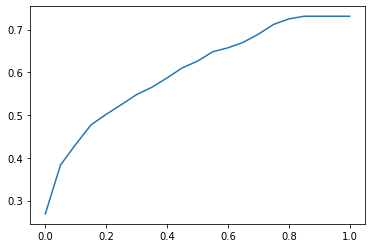

In [69]:
plt.plot(thresholds,scores)

### Confusion tables

In [70]:
 actual_positive = (y_val ==1)
 actual_negative = (y_val ==0)

In [71]:
t=0.5
predict_positive = (y_pred>=t)
predict_negative = (y_pred <t)

In [72]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_negative & actual_positive).sum()
fn = (predict_positive & actual_negative).sum()

In [73]:
tp, tn, fp, fn

confusion_matrix =np.array([
    [tn, fp],
    [fn,tp]
    ])


In [74]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.57, 0.21],
       [0.16, 0.06]])

### Precision
Precision is the fraction of positive predictions that are correct, thus it is TP/positive

In [75]:
p = tp / (tp + fp)
p
# we will send the mail to tp+fp people, and only tp were going to churn

0.20844327176781002

### Recall
Recall is the fraction of correctly identified examples
tp/tp+fn

In [76]:
r = tp / (tp + fn)
r
# we fail to identify 1-r% of people who will churn

0.2581699346405229

Uisng the p and r, we saw that our model is not that good. And high accuracy doesnt lead to good model

## ROC Curves
PREDICTIONS
A       NEG POS  
C      _________
T NEG |[TN]|[FP]|
U POS |[FN]|[TP]|
A      _________
L


False positive rate = False Positive/ True Negative + False Positive    [minimize the FLR]

True positive rate = True  Positive/ False Negative + True Positive     [maximize the TPR]

In [77]:
tpr =tp / (tp+fn)
fpr =fp / (tn+fp) 

In [78]:
scores = []

thresholds = np.linspace(0,1,100)

for t in thresholds: 
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_negative & actual_positive).sum()
    fn = (predict_positive & actual_negative).sum()

    scores.append((t, tp, fp, fn, tn))

In [79]:
columns= ['threshold','tp', 'fp', 'fn', 'tn']
df_scores=pd.DataFrame(scores, columns=columns)

In [80]:
df_scores['tpr'] =df_scores.tp / (df_scores.tp+df_scores.fn)
df_scores['fpr'] =df_scores.fp / (df_scores.tn+df_scores.fp) 

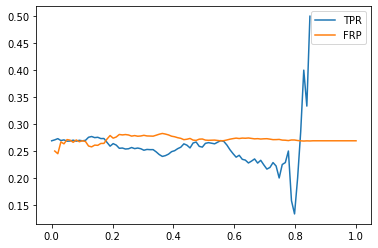

In [81]:
plt.plot( df_scores.threshold,df_scores['tpr'], label ="TPR")
plt.plot( df_scores.threshold,df_scores['fpr'], label ="FRP")
plt.legend()

## Random Model

To determine if our model is right or not, we must compare it with a random model/baseline. As all the things about the model cant be teremined using accuracy

In [82]:
#Random model
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))
((y_rand>=0.5)==y_val).mean()

0.48261178140525196

In [83]:
#we are plotting everything related the model that we did before
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0,1,100)

    for t in thresholds: 
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_rand >= t)
        predict_negative = (y_rand < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_negative & actual_positive).sum()
        fn = (predict_positive & actual_negative).sum()

        scores.append((t, tp, fp, fn, tn))

    columns= ['threshold','tp', 'fp', 'fn', 'tn']
    df_scores=pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] =df_scores.tp / (df_scores.tp+df_scores.fn)
    df_scores['fpr'] =df_scores.fp / (df_scores.tn+df_scores.fp) 

    return df_scores


In [84]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [85]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.000000,379,0,1030,0,0.268985,NaN
10,0.101010,336,43,933,97,0.264775,0.307143
20,0.202020,301,78,826,204,0.267081,0.276596
30,0.303030,260,119,735,295,0.261307,0.287440
40,0.404040,215,164,639,391,0.251756,0.295495
50,0.505051,184,195,531,499,0.257343,0.280980
60,0.606061,146,233,413,617,0.261181,0.274118
70,0.707071,99,280,314,716,0.239709,0.281124
80,0.808081,57,322,212,818,0.211896,0.282456
90,0.909091,28,351,98,932,0.222222,0.273578


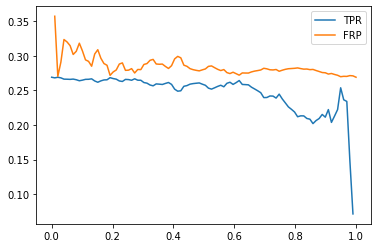

In [86]:
plt.plot( df_rand.threshold,df_rand['tpr'], label ="TPR")
plt.plot( df_rand.threshold,df_rand['fpr'], label ="FRP")
plt.legend()

## Ideal model

In [87]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 0).sum()
num_neg, num_pos

(1030, 1030)

In [88]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])

In [89]:
1-y_val.mean()

0.7310149041873669

In [90]:
y_ideal_pred=np.linspace(0,1, len(y_ideal))
((y_ideal_pred >=0.731)==y_ideal).mean()

0.7689320388349514

## Putting everything together

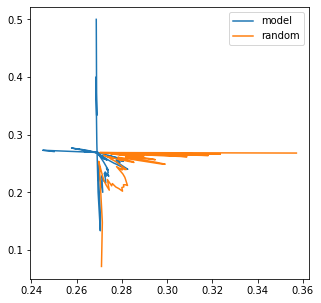

In [94]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label = "model")
plt.plot(df_rand.fpr, df_rand.tpr, label = "random")

plt.legend()